## Dunn & Koo Figure 3

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import h5py
import conutils
import random
from six.moves import cPickle
import seaborn as sns
import os
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score

%matplotlib inline

# Figure 3a

ROC curves for each of the original models (i.e. without incrporating multivariate partial correlations)

In [2]:
# Load validation data
#
ndata = 1000000

filename = '../valideval_dataset_unscattered.hdf5'
group_name = ['validation_data']
dataset = h5py.File(filename,'r')
%time vs_valid = np.array(dataset['/'+group_name[0]+'/vs_valid'])
label_valid = np.array(dataset['/'+group_name[0]+'/label_valid'])
true_lbl = np.reshape(label_valid,(ndata,))

Wall time: 10.6 ms


In [3]:
# Load raw validation data
#
filename = '../../Tensor/kaggle_connect_data/normal_dataset.hdf5'
group_name = ['normal_data']
dataset = h5py.File(filename,'r')
%time F_4 = np.array(dataset['/'+group_name[0]+'/F_4'])
scores_4 = np.array(dataset['/'+group_name[0]+'/scores_4'])

Wall time: 667 ms


In [5]:
# Plot corr coeff predictions as comparison
#
pred_lbl_corr = np.corrcoef(F_4.T)
pred_lbl_corr = np.reshape(pred_lbl_corr,(ndata,))

precision_corr, recall_corr, thresholds = precision_recall_curve(true_lbl, pred_lbl_corr)

In [6]:
# Collect only the cross-val pickles
#
path = '../results/pickles/'
files = os.listdir(path)
files = [f for f in files if 'crossval' in f and not 'partialcorr' in f]
files

['dataset2_residual2_crossval.pickle',
 'dataset4_residual2_crossval.pickle',
 'dataset5_residual2_crossval.pickle',
 'dataset6_residual2_crossval.pickle',
 'dataset7_residual2_crossval.pickle']

0.940646628566
0.940389173229
0.941761032565
0.940622971114
0.940215713659
0.942601372206


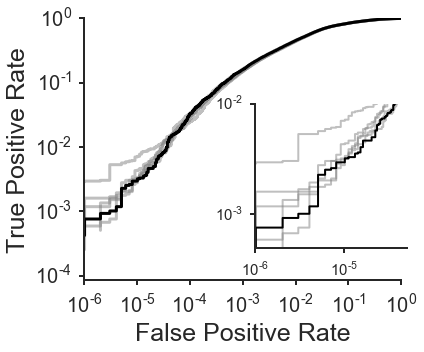

In [9]:
# Load in data, plot ROC curves

sns.set_style("white", {"xtick.major.size": "5", "ytick.major.size": "5",'axes.linewidth': 2})

fig, ax = plt.subplots(figsize=(6,5))

pred_all = np.zeros(true_lbl.shape)
for i in range(len(files)):
    file = files[i]
    savefile = os.path.join(path, file)
    f = open(savefile, 'rb')
    pred_lbl = cPickle.load(f)
    pred_all += pred_lbl
    f.close()
    fpr, tpr, thresholds = roc_curve(true_lbl, pred_lbl)
    print(auc(fpr, tpr))
    ax.loglog(fpr,tpr,'gray',alpha=0.5,linewidth=3)
    
# Ensemble average
pred_all = pred_all/len(files)
fpr, tpr, thresholds = roc_curve(true_lbl, pred_all)
print(auc(fpr, tpr))
ax.loglog(fpr,tpr,'k',linewidth=3)

plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate',size=25)
plt.xlabel('False Positive Rate',size=25)
ax = plt.gca()
ax.tick_params(width=2,labelsize=20)
plt.tight_layout()
sns.despine()

# Plot zoom-in inset
left, bottom, width, height = [0.6, 0.3, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

for i in range(len(files)):
    file = files[i]
    savefile = os.path.join(path, file)
    f = open(savefile, 'rb')
    pred_lbl = cPickle.load(f)
    f.close()
    fpr, tpr, thresholds = roc_curve(true_lbl, pred_lbl)
    ax2.loglog(fpr,tpr,'gray',alpha=0.5,linewidth=2)

fpr, tpr, thresholds = roc_curve(true_lbl, pred_all)
ax2.loglog(fpr,tpr,'k',linewidth=2)

plt.ylim([5e-4, 1e-2])
plt.xlim([1e-6, 5e-5])
ax2.tick_params(width=2,labelsize=15)
#plt.tight_layout()
sns.despine()


plt.savefig('./figure3a.pdf')

# Figure 3b

PR curves for each of the original models (i.e. without incrporating multivariate partial correlations)

0.347464505669
0.359763266539
0.348142790866
0.359556288951
0.345025933899
0.358681686203


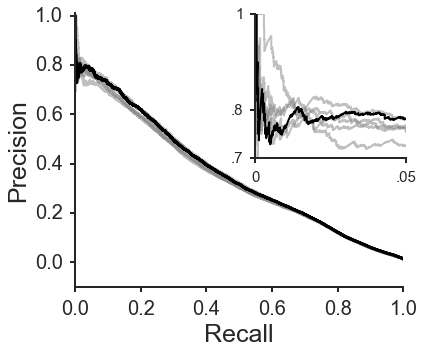

In [13]:
fig, ax = plt.subplots(figsize=(6,5))

pred_all = np.zeros(true_lbl.shape)
for i in range(len(files)):
    file = files[i]
    savefile = os.path.join(path, file)
    f = open(savefile, 'rb')
    pred_lbl = cPickle.load(f)
    pred_all += pred_lbl
    f.close()
    precision, recall, thresholds = precision_recall_curve(true_lbl, pred_lbl)
    print(auc(recall, precision))
    plt.plot(recall,precision,'gray',alpha=0.5,linewidth=3)
    
# Ensemble average
pred_all = pred_all/len(files)
precision, recall, thresholds = precision_recall_curve(true_lbl, pred_all)
print(auc(recall, precision))
plt.plot(recall,precision,'k',linewidth=3)

#plt.plot(recall_corr,precision_corr,'r',linewidth=3)

plt.ylim([-0.1, 1.01])
plt.ylabel('Precision',size=25)
plt.xlabel('Recall',size=25)
ax = plt.gca()
ax.tick_params(width=2,labelsize=20)
plt.tight_layout()
sns.despine()

# Plot zoom-in inset
left, bottom, width, height = [0.6, 0.55, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

for i in np.r_[1:3,4:7]:
    file = files[i]
    savefile = os.path.join(path, file)
    f = open(savefile, 'rb')
    pred_lbl = cPickle.load(f)
    f.close()
    precision, recall, thresholds = precision_recall_curve(true_lbl, pred_lbl)
    ax2.plot(recall,precision,'gray',alpha=0.5,linewidth=2)

precision, recall, thresholds = precision_recall_curve(true_lbl, pred_all)
ax2.plot(recall,precision,'k',linewidth=2)

plt.ylim([0.7, 1])
plt.xlim([0, 0.05])
plt.xticks([0, 0.05])
ax2.set_xticklabels(['0', '.05'])
plt.yticks([0.7, 0.8, 1])
ax2.set_yticklabels(['.7','.8', '1'])
ax2.tick_params(width=2,labelsize=15)
#ax2.xticks()
#plt.tight_layout()
sns.despine()

plt.savefig('./paper/figure3b.pdf')

# Figure 3c

Problematic connectivity motifs, generated in powerpoint